# *Project. Data Analysis and Modeling* <br>

## Goal
> #### EDA : Visualize the RPE mean for each column 
> #### Modeling : Predicting RPE Values

# **Import Libraries & Read Dataset**

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [2]:
file_name = '/kaggle/input/weight-training/strong.csv'
data = pd.read_csv(file_name)

In [3]:
data.head()

,Date,Workout Name,Duration,Exercise Name,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE
0,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),1,35.0,10,0,0,NaN,"Focusing on CHEST, SHOULDERS and TRICEPS",9.0
1,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),2,35.0,9,0,0,NaN,NaN,10.0
2,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),3,35.0,8,0,0,NaN,NaN,10.0
3,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),4,35.0,7,0,0,NaN,NaN,10.0
4,2021-09-13 10:41:41,PUSH 1,1h 12m,Incline Cable Chest Fly,1,12.5,12,0,0,NaN,NaN,9.5


In [4]:
data.describe()

,Set Order,Weight,Reps,Distance,Seconds,RPE
count,3989.000000,3989.000000,3989.000000,3989.0,3989.000000,3767.000000
mean,2.170970,34.300890,9.534219,0.0,0.075207,9.563048
std,1.042406,17.712179,3.627689,0.0,4.749952,0.684452
min,1.000000,0.000000,0.000000,0.0,0.000000,6.000000
25%,1.000000,25.000000,7.000000,0.0,0.000000,9.000000
50%,2.000000,30.000000,9.000000,0.0,0.000000,10.000000
75%,3.000000,45.000000,12.000000,0.0,0.000000,10.000000
max,6.000000,195.000000,30.000000,0.0,300.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3989 non-null   object 
 1   Workout Name   3989 non-null   object 
 2   Duration       3989 non-null   object 
 3   Exercise Name  3989 non-null   object 
 4   Set Order      3989 non-null   int64  
 5   Weight         3989 non-null   float64
 6   Reps           3989 non-null   int64  
 7   Distance       3989 non-null   int64  
 8   Seconds        3989 non-null   int64  
 9   Notes          35 non-null     object 
 10  Workout Notes  218 non-null    object 
 11  RPE            3767 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 374.1+ KB


In [6]:
data.isna().mean()

Date             0.000000
Workout Name     0.000000
Duration         0.000000
Exercise Name    0.000000
Set Order        0.000000
Weight           0.000000
Reps             0.000000
Distance         0.000000
Seconds          0.000000
Notes            0.991226
Workout Notes    0.945350
RPE              0.055653
dtype: float64

# **Data Preprocessing**

#### Remove the 'Workout Notes' and 'Notes' columns with a missing value ratio of 90% or more. 

In [7]:
data_pre = data.drop(['Notes','Workout Notes'],axis=1)
data_pre = data_pre.dropna() # RPE missing value preprocessing

In [8]:
print(data_pre['Distance'].unique())
print(data_pre['Seconds'].unique())

[0]
[0]


#### 'Date', 'Distance' and 'Seconds' have '0' value or are not used for analysis.

In [9]:
data_pre = data_pre.drop(['Date','Distance','Seconds'],axis=1)

In [10]:
data_pre.isna().sum()

Workout Name     0
Duration         0
Exercise Name    0
Set Order        0
Weight           0
Reps             0
RPE              0
dtype: int64

In [11]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 0 to 3988
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Workout Name   3767 non-null   object 
 1   Duration       3767 non-null   object 
 2   Exercise Name  3767 non-null   object 
 3   Set Order      3767 non-null   int64  
 4   Weight         3767 non-null   float64
 5   Reps           3767 non-null   int64  
 6   RPE            3767 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 235.4+ KB


#### Unify the 'Duration' in minutes.

In [12]:
data_pre['Duration'].unique()

array(['1h 12m', '1h 4m', '1h 2m', '1h 1m', '51m', '57m', '54m', '1h 21m',
       '1h 14m', '1h 10m', '1h 24m', '1h 16m', '1h 9m', '1h 6m', '1h 8m',
       '1h 5m', '37m', '1h', '58m', '39m', '45m', '53m', '52m', '42m',
       '40m', '50m', '41m', '32m', '35m', '38m', '34m', '43m', '48m',
       '47m', '49m', '33m', '28m', '36m', '44m', '55m', '18m', '46m',
       '1h 7m', '24m', '56m', '1h 50m', '59m', '1h 38m', '1h 34m', '30m',
       '1h 3m', '1h 18m', '31m', '1h 19m', '1h 43m', '9m'], dtype=object)

In [13]:
def convert_min(Duration):
    if 'h' in Duration and 'm' in Duration:
        hour, minute = map(int, Duration.replace('h', ' ').replace('m', '').split())
        return hour * 60 + minute
    elif 'h' in Duration:
        hour = int(Duration.replace('h', ''))
        return hour * 60
    elif 'm' in Duration:
        minute = int(Duration.replace('m', ''))
        return minute
    else:
        return None

data_pre['Duration'] = data_pre['Duration'].apply(convert_min)

In [14]:
data_pre

,Workout Name,Duration,Exercise Name,Set Order,Weight,Reps,RPE
0,PUSH 1,72,Bench Press (Barbell),1,35.00,10,9.0
1,PUSH 1,72,Bench Press (Barbell),2,35.00,9,10.0
2,PUSH 1,72,Bench Press (Barbell),3,35.00,8,10.0
3,PUSH 1,72,Bench Press (Barbell),4,35.00,7,10.0
4,PUSH 1,72,Incline Cable Chest Fly,1,12.50,12,9.5
...,...,...,...,...,...,...,...
3984,PULL 2,30,Lateral Raise (Dumbbell),4,18.00,3,10.0
3985,PULL 2,30,Seated Row (Cable),1,41.25,12,9.5
3986,PULL 2,30,Seated Row (Cable),2,41.25,8,10.0
3987,PULL 2,30,Seated Row (Cable),3,41.25,5,10.0


In [15]:
print(data.shape)
print(data_pre.shape)

(3989, 12)
(3767, 7)


# Pivot table & Charts

In [16]:
# Indexing list function
cols = data_pre.columns

for col in cols:
    globals()[col] = data_pre[col]

cols

Index(['Workout Name', 'Duration', 'Exercise Name', 'Set Order', 'Weight',
       'Reps', 'RPE'],
      dtype='object')

In [17]:
pivot_Duration = pd.pivot_table(data_pre, index='Duration', values='RPE',aggfunc='mean')
pivot_Duration

,RPE
Duration,
9,9.500000
18,9.750000
24,9.500000
28,9.783333
30,9.750000
31,9.750000
32,9.469697
33,9.500000
34,9.657143


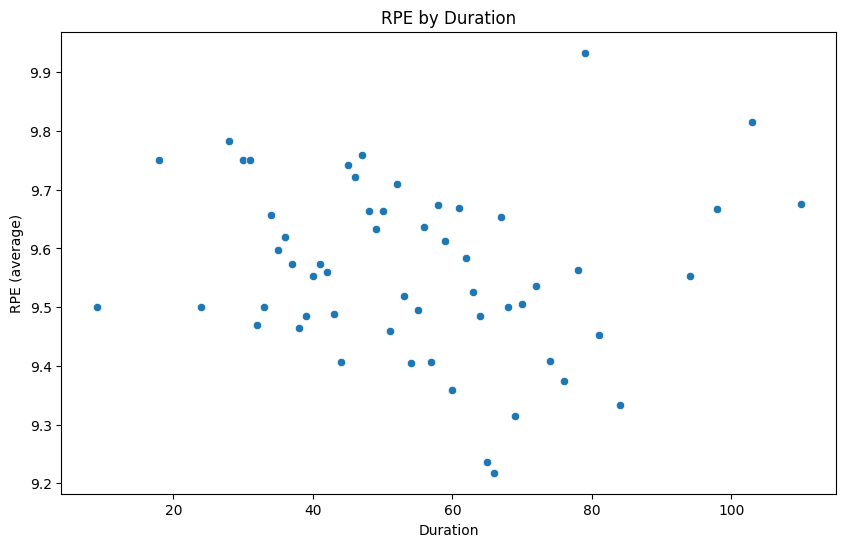

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pivot_Duration.index, y='RPE', data=pivot_Duration)
plt.xlabel('Duration')
plt.ylabel('RPE (average)')
plt.title('RPE by Duration')
plt.show()

In [19]:
pivot_Work = pd.pivot_table(data_pre, index='Workout Name', values='RPE',aggfunc='mean')
pivot_Work

,RPE
Workout Name,
Full Body,9.457143
Full Body 2,9.495385
LEGS 1,8.500000
PULL 1,9.276536
PULL 2,9.625773
PULL 3,9.475806
PUSH 1,9.323840
PUSH 2,9.677486
PUSH 3,9.371795


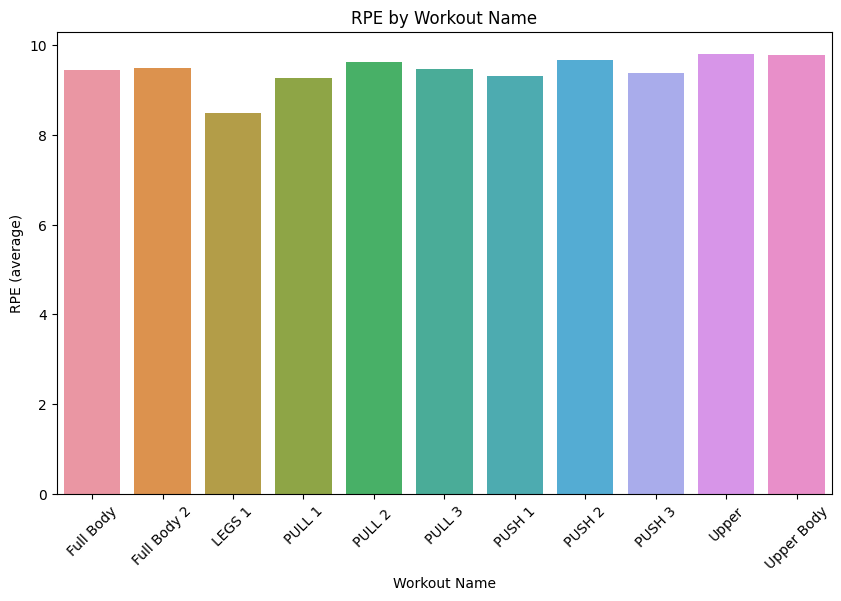

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_Work.index, y='RPE', data=pivot_Work)
plt.xlabel('Workout Name')
plt.ylabel('RPE (average)')
plt.title('RPE by Workout Name')
plt.xticks(rotation=45)
plt.show()

In [21]:
pivot_Exercise = pd.pivot_table(data_pre, index='Exercise Name', values='RPE',aggfunc='mean')
pivot_Exercise

,RPE
Exercise Name,
Bench Press (Barbell),9.179167
Bench Press (Dumbbell),9.589595
Bench Press - Close Grip (Barbell),9.421569
Bent Over One Arm Row (Dumbbell),9.422619
Bent Over Row (Barbell),8.333333
Bent Over Row (Dumbbell),9.166667
Bicep Curl (Barbell),9.556250
Bicep Curl (Dumbbell),9.791304
Cable Crunch,8.767857


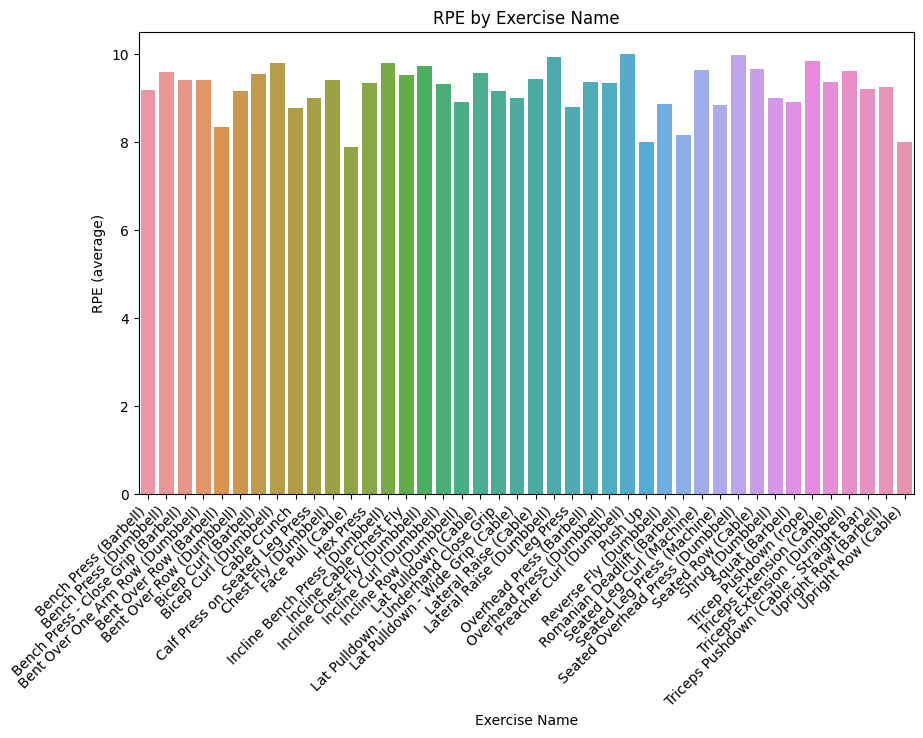

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_Exercise.index, y='RPE', data=pivot_Exercise)
plt.xlabel('Exercise Name')
plt.ylabel('RPE (average)')
plt.title('RPE by Exercise Name')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
pivot_Set = pd.pivot_table(data_pre, index='Set Order', values='RPE',aggfunc='mean')
pivot_Set

,RPE
Set Order,
1,9.092213
2,9.614215
3,9.925749
4,9.985263
5,10.000000
6,10.000000


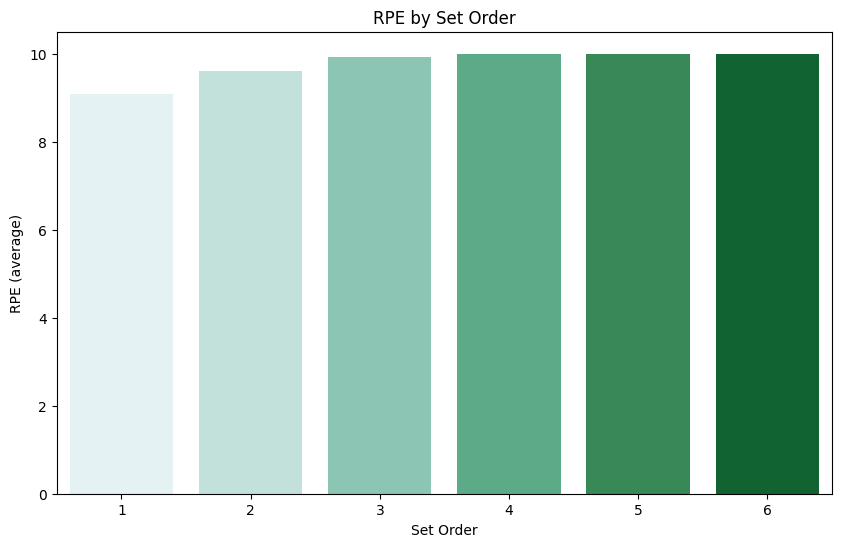

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_Set.index, y='RPE', data=pivot_Set, palette = 'BuGn')
plt.xlabel('Set Order')
plt.ylabel('RPE (average)')
plt.title('RPE by Set Order')
plt.show()

In [25]:
pivot_Weight = pd.pivot_table(data_pre, index='Weight', values='RPE',aggfunc='mean')
pivot_Weight

,RPE
Weight,
0.00,8.000000
3.75,9.423077
6.25,9.500000
8.00,10.000000
8.75,10.000000
...,...
125.00,7.500000
155.00,9.000000
175.00,8.750000


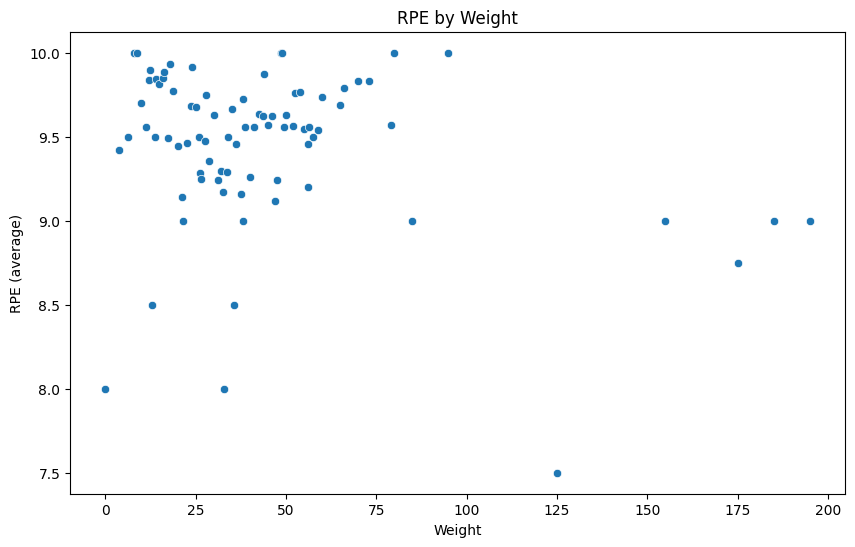

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pivot_Weight.index, y='RPE', data=pivot_Weight)
plt.xticks(rotation=0)
plt.xlabel('Weight')
plt.ylabel('RPE (average)')
plt.title('RPE by Weight')
plt.show()

In [27]:
pivot_Reps = pd.pivot_table(data_pre, index='Reps', values='RPE',aggfunc='mean')
pivot_Reps

,RPE
Reps,
2,10.000000
3,10.000000
4,9.978022
5,9.891489
6,9.879888
7,9.767152
8,9.633929
9,9.610193
10,9.383436


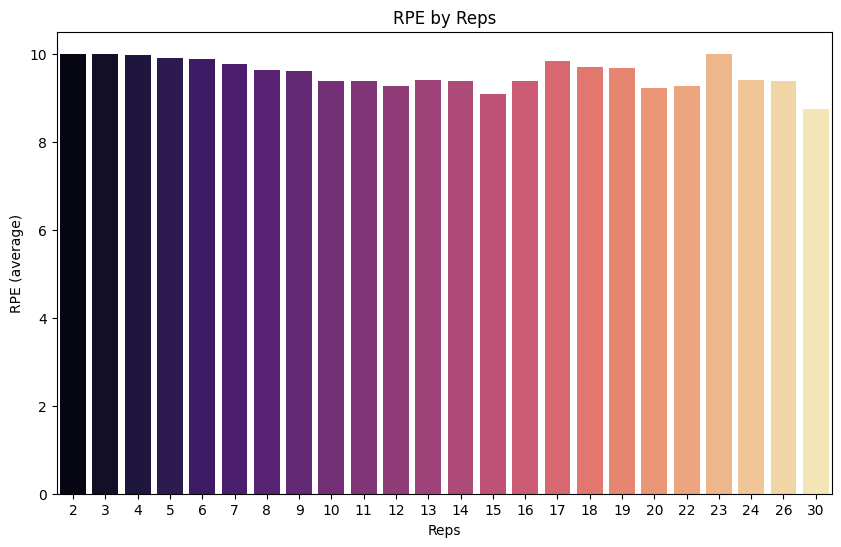

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_Reps.index, y='RPE', data=pivot_Reps,palette = 'magma',)
plt.xlabel('Reps')
plt.ylabel('RPE (average)')
plt.title('RPE by Reps')
plt.show()

#### Below are chart showing additional different correlations.

In [29]:
pivot_other1 = pd.pivot_table(data_pre, index='Workout Name', values='Duration',aggfunc='mean')
pivot_other1

,Duration
Workout Name,
Full Body,60.457143
Full Body 2,64.006154
LEGS 1,69.000000
PULL 1,59.189944
PULL 2,48.439175
PULL 3,42.645161
PUSH 1,56.048523
PUSH 2,51.426796
PUSH 3,42.294872


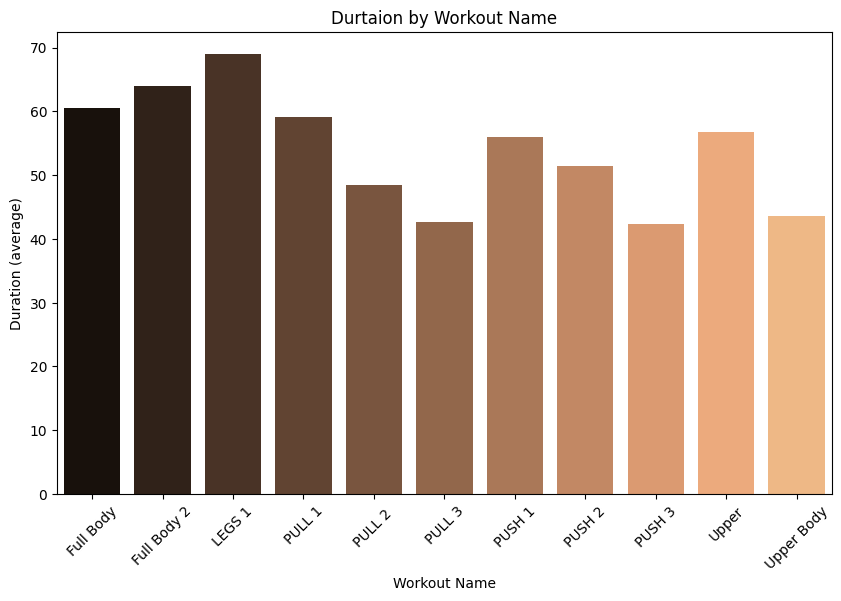

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_other1.index, y='Duration', data=pivot_other1 ,palette = 'copper')
plt.xticks(rotation=45)
plt.xlabel('Workout Name')
plt.ylabel('Duration (average)')
plt.title('Durtaion by Workout Name')
plt.show()

In [31]:
pivot_other2 = pd.pivot_table(data_pre, index='Exercise Name', values='Duration',aggfunc='mean')
pivot_other2

,Duration
Exercise Name,
Bench Press (Barbell),54.766667
Bench Press (Dumbbell),45.589595
Bench Press - Close Grip (Barbell),53.960784
Bent Over One Arm Row (Dumbbell),54.059524
Bent Over Row (Barbell),53.500000
Bent Over Row (Dumbbell),98.000000
Bicep Curl (Barbell),53.700000
Bicep Curl (Dumbbell),48.362319
Cable Crunch,63.071429


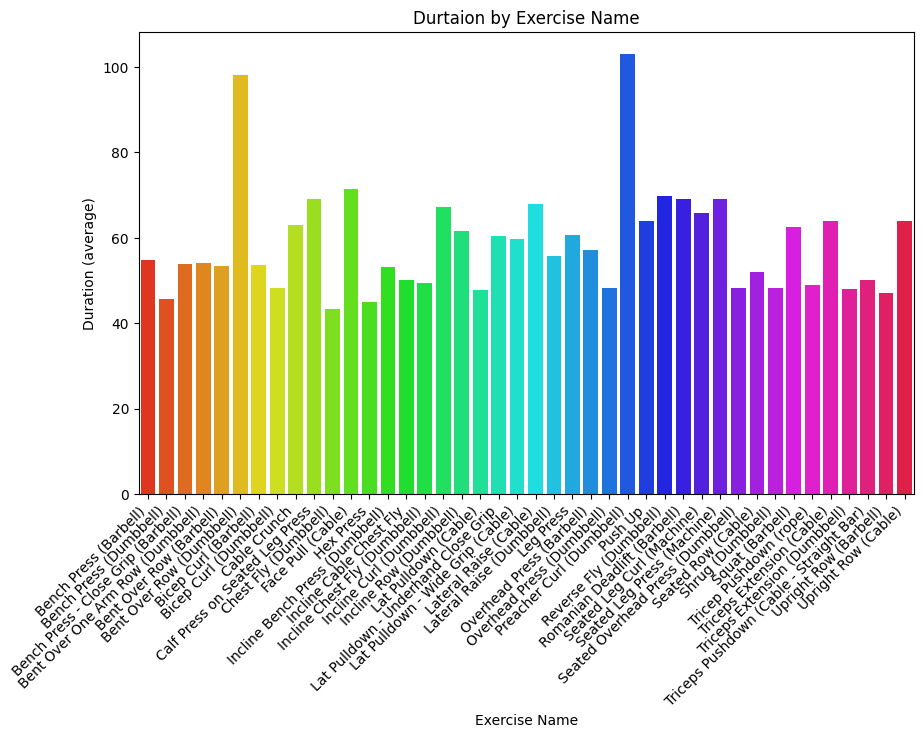

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_other2.index, y='Duration', data=pivot_other2 ,palette = 'hsv')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Exercise Name')
plt.ylabel('Duration (average)')
plt.title('Durtaion by Exercise Name')
plt.show()

In [33]:
pivot_other3 = pd.pivot_table(data_pre, index='Reps', values='Weight',aggfunc='mean')
pivot_other3

,Weight
Reps,
2,30.000000
3,29.490385
4,30.230769
5,32.804255
6,34.220670
7,36.114865
8,36.877976
9,35.709366
10,34.310327


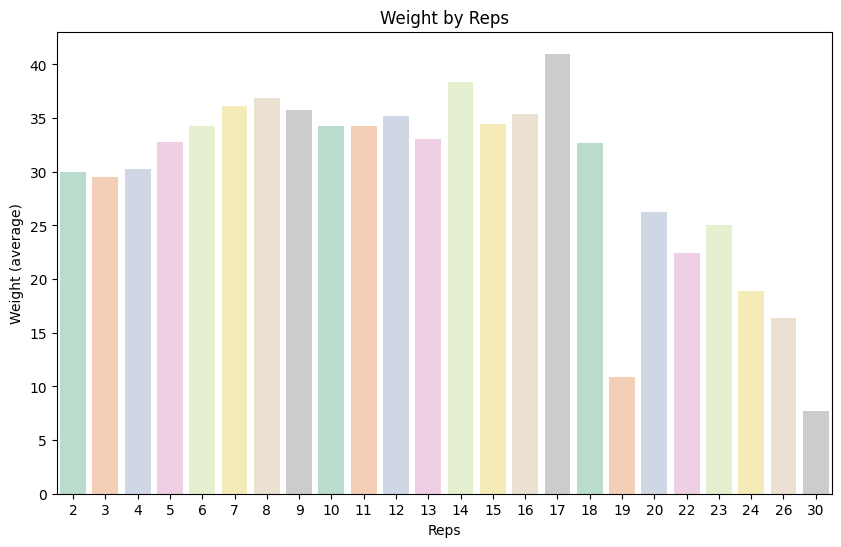

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=pivot_other3.index, y='Weight', data=pivot_other3 ,palette = 'Pastel2')
plt.xlabel('Reps')
plt.ylabel('Weight (average)')
plt.title('Weight by Reps')
plt.show()

# Data Analysis and Modeling

## Check the correlation

In [35]:
data_pre.describe() 

,Duration,Set Order,Weight,Reps,RPE
count,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000
mean,51.410406,2.166180,34.600743,9.440934,9.563048
std,13.392493,1.035479,17.055072,3.585338,0.684452
min,9.000000,1.000000,0.000000,2.000000,6.000000
25%,42.000000,1.000000,25.000000,7.000000,9.000000
50%,49.000000,2.000000,30.000000,9.000000,10.000000
75%,58.000000,3.000000,45.000000,11.000000,10.000000
max,110.000000,6.000000,195.000000,30.000000,10.000000


In [36]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 0 to 3988
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Workout Name   3767 non-null   object 
 1   Duration       3767 non-null   int64  
 2   Exercise Name  3767 non-null   object 
 3   Set Order      3767 non-null   int64  
 4   Weight         3767 non-null   float64
 5   Reps           3767 non-null   int64  
 6   RPE            3767 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 235.4+ KB


In [37]:
numeric_data_pre = data_pre.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_data_pre.corr()
round(corr_matrix,2)

,Duration,Set Order,Weight,Reps,RPE
Duration,1.00,0.06,-0.03,0.30,-0.03
Set Order,0.06,1.00,-0.02,-0.39,0.49
Weight,-0.03,-0.02,1.00,-0.07,-0.08
Reps,0.30,-0.39,-0.07,1.00,-0.29
RPE,-0.03,0.49,-0.08,-0.29,1.00


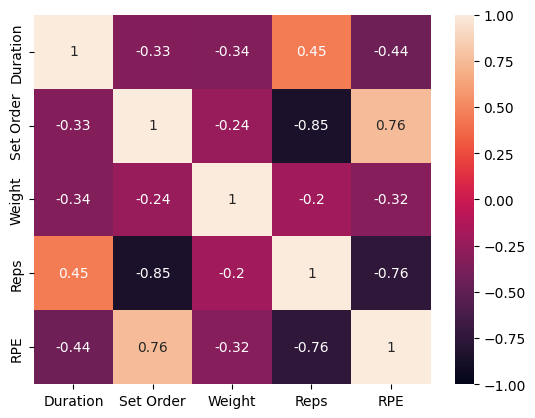

In [38]:
# scaling : -1 ~ 1
sns.heatmap(corr_matrix.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## Data Preprocessing For Model

In [39]:
data_pre = pd.get_dummies(data_pre, columns=['Workout Name', 'Exercise Name'], drop_first=True)
data_pre

,Duration,Set Order,Weight,Reps,RPE,Workout Name_Full Body 2,Workout Name_LEGS 1,Workout Name_PULL 1,Workout Name_PULL 2,Workout Name_PULL 3,...,Exercise Name_Seated Overhead Press (Dumbbell),Exercise Name_Seated Row (Cable),Exercise Name_Shrug (Dumbbell),Exercise Name_Squat (Barbell),Exercise Name_Tricep Pushdown (rope),Exercise Name_Triceps Extension (Cable),Exercise Name_Triceps Extension (Dumbbell),Exercise Name_Triceps Pushdown (Cable - Straight Bar),Exercise Name_Upright Row (Barbell),Exercise Name_Upright Row (Cable)
0,72,1,35.00,10,9.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,72,2,35.00,9,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,72,3,35.00,8,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,72,4,35.00,7,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,72,1,12.50,12,9.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,30,4,18.00,3,10.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3985,30,1,41.25,12,9.5,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3986,30,2,41.25,8,10.0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3987,30,3,41.25,5,10.0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


> # Modeling : Linear Regression

### *Modeling*

In [40]:
X = data_pre.drop('RPE', axis=1)
y = data_pre['RPE']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

pred_LR = model_LR.predict(X_test)

### *evaluation*

In [41]:
RMSE_L  = mean_squared_error(y_test, pred_LR) ** 0.5
R2_L = r2_score(y_test, pred_LR)

print("RMSE :",round(RMSE_L,2))
print("R2 :",round(R2_L,2))

RMSE : 0.5
R2 : 0.51


> # Modeling : Random Forest

### *Modeling*

In [42]:
model_RF = RandomForestRegressor(random_state=100)
model_RF.fit(X_train,y_train)
train_pred = model_RF.predict(X_train)
test_pred = model_RF.predict(X_test)

### *evaluation*

In [43]:
Train_RMSE = mean_squared_error(y_train, train_pred) ** 0.5
Test_RMSE = mean_squared_error(y_test, test_pred) ** 0.5

print("Train_RMSE :",round(Train_RMSE,2))
print("Test_RMSE :",round(Test_RMSE,2))

Train_RMSE : 0.13
Test_RMSE : 0.36


> # Modeling : XGBoost

### *Modeling*

In [44]:
model_XGB = xgb.XGBRegressor()
model_XGB.fit(X_train,y_train)
pred_XGB = model_XGB.predict(X_test)

### *evaluation*

In [45]:
RMSE_XGB = mean_squared_error(y_test, pred_XGB) ** 0.5
R2_XGB = r2_score(y_test, pred_XGB)

print("RMSE :",round(RMSE_XGB,2))
print("R2 :",round(R2_XGB,2))

RMSE : 0.35
R2 : 0.75


### *Grid Search*

In [46]:
param_grid = {
    'learning_rate':[0.01,0.1,0.3],
    'max_depth':[5,7,10],         
    'subsample':[0.5,0.7,1],
    'n_estimators':[300,500,1000]
}
                    
score = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, scoring=score, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.5}


In [47]:
best_model_XGB = grid_search.best_estimator_
best_pred_XGB = best_model_XGB.predict(X_test)

RMSE_R = mean_squared_error(y_test,best_pred_XGB) ** 0.5
R2_R = r2_score(y_test,best_pred_XGB)

print("RMSE :",round(RMSE_R,2))
print("R2 :",round(R2_R,2))

RMSE : 0.34
R2 : 0.77


# **Modeling Conclusion**

In [48]:
print('Linear Regression')
print("RMSE :",round(RMSE_L,2))
print("R2 :",round(R2_L,2))
print('-'*20)
print('Random Forest')
print("Train_RMSE :",round(Train_RMSE,2))
print("Test_RMSE :",round(Test_RMSE,2))
print('-'*20)
print('XGBoost')
print("RMSE :",round(RMSE_XGB,2))
print("R2 :",round(R2_XGB,2))
print('-'*20)
print('Best_XGBoost')
print("RMSE :",round(RMSE_R,2))
print("R2 :",round(R2_R,2))

Linear Regression
RMSE : 0.5
R2 : 0.51
--------------------
Random Forest
Train_RMSE : 0.13
Test_RMSE : 0.36
--------------------
XGBoost
RMSE : 0.35
R2 : 0.75
--------------------
Best_XGBoost
RMSE : 0.34
R2 : 0.77


# Thanks